In [ ]:
print(f"{mod_tr_data.shape}")

(5585, 39)


#Predicting Genetic disorders using ML approach


##Importing Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
print(f"Dimentions of data : Train data {train_data.shape} and Test data {test_data.shape}")


Dimentions of data : Train data (22083, 45) and Test data (9465, 43)


In [ ]:
train_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
train_data.select_dtypes(include='object').columns

Index(['Patient Id', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Patient First Name', 'Family Name',
       'Father's name', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [ ]:
train_data.drop(columns=['Patient Id', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute'], inplace=True)
test_data.drop(columns=['Patient Id', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute'], inplace=True)

In [ ]:
##Changing data ; 1 == Yes ; 0 == No
mod_tr_data = train_data.replace({ "Yes" : 1, "No" : 1})
mod_ts_data = test_data.replace({ "Yes" : 1, "No" : 1})

In [ ]:
mod_tr_data.dropna(inplace=True)
mod_ts_data.dropna(inplace=True)

In [ ]:
print(f"Dimentions of data : Train data {train_data.shape} and Test data {test_data.shape}")

Dimentions of data : Train data (22083, 39) and Test data (9465, 37)


In [ ]:
print(f"Dimentions of cleaned data  : Train data {mod_tr_data.shape} and Test data {mod_ts_data.shape}")

Dimentions of cleaned data  : Train data (5629, 39) and Test data (2283, 37)


In [ ]:
mod_tr_data.select_dtypes(include='object').columns

,count
Status,1
Respiratory Rate (breaths/min),1
Heart Rate (rates/min,1
Follow-up,1
Gender,1
Birth asphyxia,1
Autopsy shows birth defect (if applicable),1
Place of birth,1
H/O radiation exposure (x-ray),1
H/O substance abuse,1


In [ ]:
mod_tr_data["Status"].value_counts()

,count
Status,
Alive,3412
Deceased,2217


<Axes: xlabel='Genetic Disorder'>

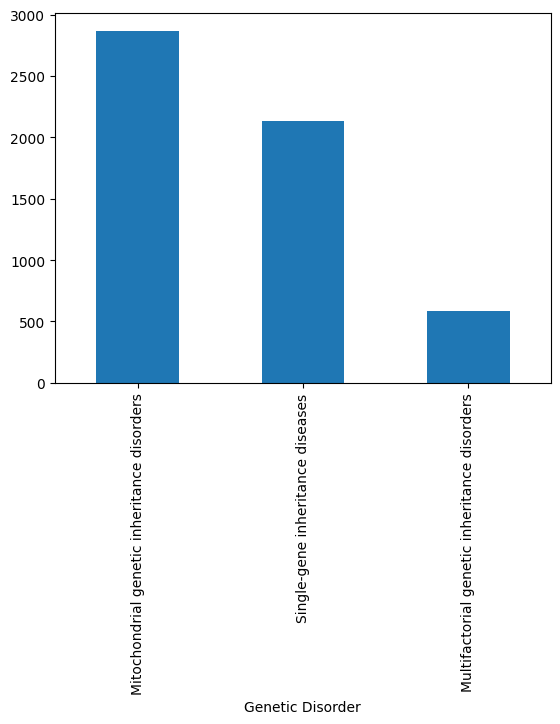

In [ ]:
mod_tr_data['Genetic Disorder'].value_counts().plot(kind='bar', )

<Axes: xlabel='Disorder Subclass'>

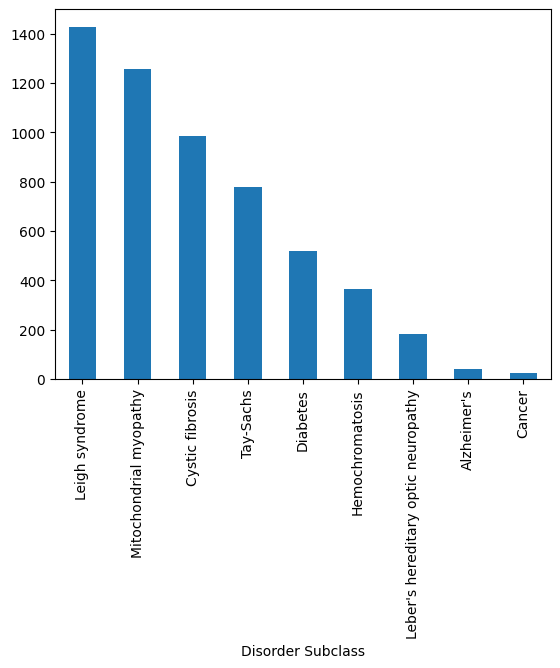

In [ ]:
mod_tr_data['Disorder Subclass'].value_counts().plot(kind='bar', )

##Splitting dataset

In [ ]:
mod_tr_data.select_dtypes(include='object').dtypes
mod_tr_data.drop(['Patient ID','Patient First Name ' , "Family Name	", "'Father's name'"	, "Institute Name" ], axis=0)

KeyError: '[\'Patient ID\', \'Patient First Name \', \'Family Name\\t\', "\'Father\'s name\'", \'Institute Name\'] not found in axis'

In [ ]:
P = mod_tr_data['Genetic Disorder']
X = mod_tr_data.drop(['Genetic Disorder'], axis=1)
Y = mod_ts_data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,xtest, ytrain, ytest = train_test_split(X, P, test_size=0.3, random_state=42)

In [ ]:
test_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


###import models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [ ]:
rf = RandomForestClassifier(random_state=42)
lr = LinearRegression()
lr_cv = LogisticRegressionCV()
log = LogisticRegression
svc = SVC()
lsvc = LinearSVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
dtr = DecisionTreeRegressor()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
list_model = [rf , lr, lr_cv, log, svc, lsvc, knn, dt, dtr, gnb, mnb, bnb]

In [ ]:
mod_tr_data['']

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
8,PID0x8ce3,11.0,1,1.0,1.0,1,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,1,1.0,1.0,1,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
14,PID0x7678,6.0,1,1.0,1.0,1,4.620420,Ruth,Homza,Cesareo,...,Multiple,3.000000,slightly abnormal,1.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
18,PID0x952d,10.0,1,1.0,1.0,1,4.751452,James,Whipple,Dvon,...,Singular,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
19,PID0x6d89,6.0,1,1.0,1.0,1,4.876896,Miguel,Canada,Zykevious,...,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis


In [1]:
corr_matrix = mod_tr_data.select_dtypes(include='number').corr()

NameError: name 'mod_tr_data' is not defined

In [ ]:
corr_matrix.plot(kind='bar')

ValueError: hexbin requires an x and y column